In [ ]:
pip install tensorflow_decision_forests


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 37.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow_decision_forests as tfdf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


**1. Data Extraction**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/online_shoppers_intention.csv')

In [ ]:
df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
df.shape

(12330, 18)

In [ ]:
df.dtypes

,0
Administrative,int64
Administrative_Duration,float64
Informational,int64
Informational_Duration,float64
ProductRelated,int64
ProductRelated_Duration,float64
BounceRates,float64
ExitRates,float64
PageValues,float64
SpecialDay,float64


In [ ]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4


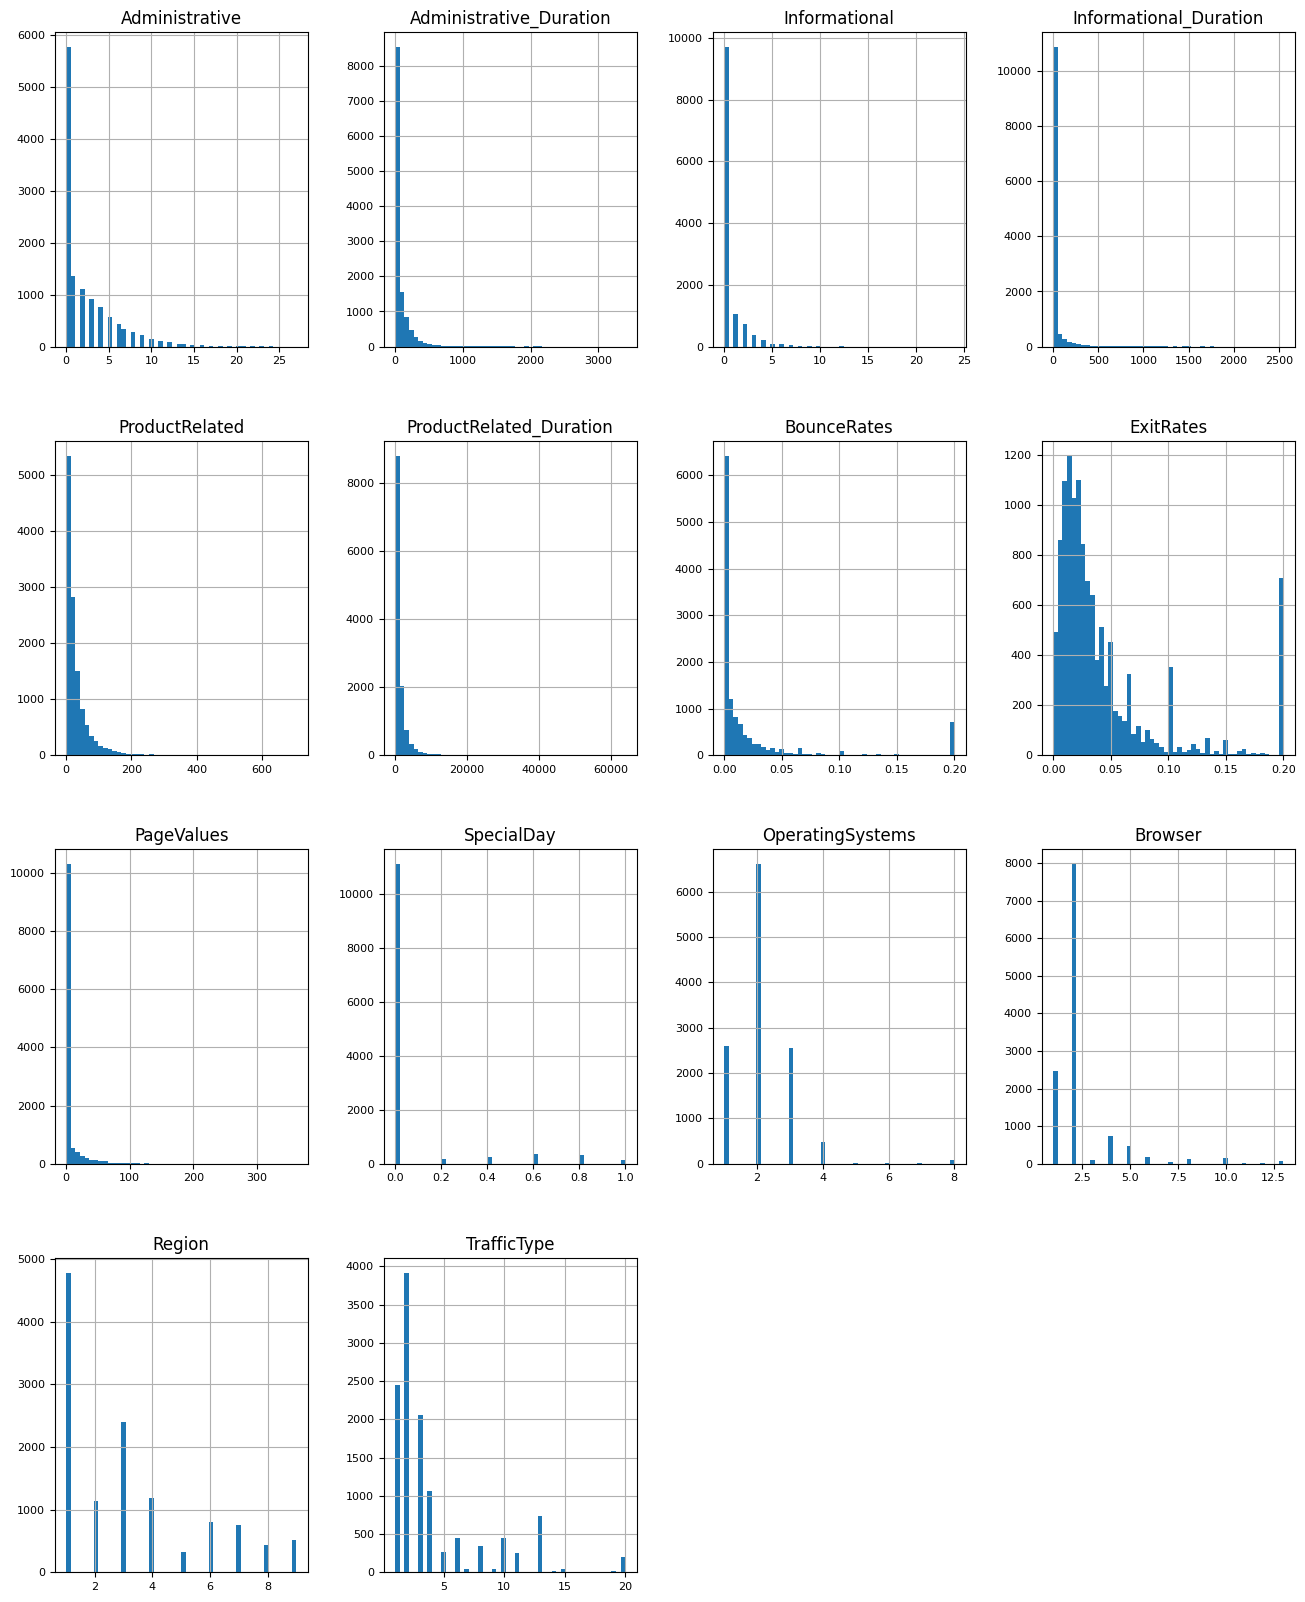

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

**2.Handling Missing Data**

In [ ]:
df.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


**3: Univariate Analysis (Analyzing One Variable at a Time)**

In [ ]:
unique_value_counts = df.nunique()
print(unique_value_counts)


Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64


Categorical Variables:

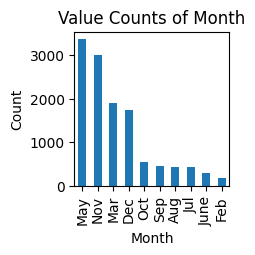

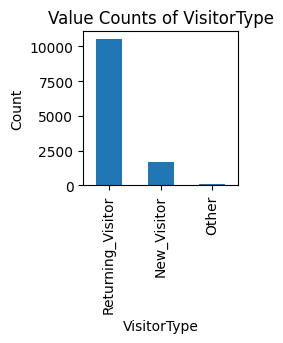

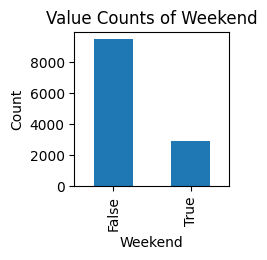

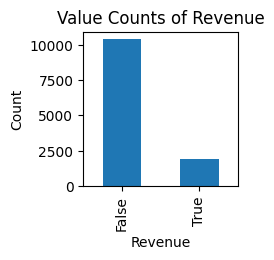

In [ ]:
features = ['Month','VisitorType','Weekend','Revenue']
for feature in features:
    plt.figure(figsize=(2, 2))
    df[feature].value_counts().plot(kind='bar')
    plt.title(f"Value Counts of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

In [ ]:
unique_values = df['Month'].unique()
print(f"Unique values in column 'column_name': {unique_values}")

Unique values in column 'column_name': ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']


In [ ]:
value_counts = df['Month'].value_counts()
print(value_counts)

# Optionally, display the distribution in percentages
percent_distribution = df['Month'].value_counts(normalize=True) * 100
print(percent_distribution)

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64
Month
May     27.283049
Nov     24.314680
Mar     15.466342
Dec     14.006488
Oct      4.452555
Sep      3.633414
Aug      3.511760
Jul      3.503650
June     2.335766
Feb      1.492295
Name: proportion, dtype: float64


Month data is imbalanced

In [ ]:
unique_values = df['VisitorType'].unique()
print(f"Unique values in column 'column_name': {unique_values}")

Unique values in column 'column_name': ['Returning_Visitor' 'New_Visitor' 'Other']


In [ ]:
value_counts = df['VisitorType'].value_counts()
print(value_counts)

# Optionally, display the distribution in percentages
percent_distribution = df['VisitorType'].value_counts(normalize=True) * 100
print(percent_distribution)

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64
VisitorType
Returning_Visitor    85.571776
New_Visitor          13.738848
Other                 0.689376
Name: proportion, dtype: float64


The data is highly imbalanced.

In [ ]:
unique_values = df['Weekend'].unique()
print(f"Unique values in column 'column_name': {unique_values}")

Unique values in column 'column_name': [False  True]


In [ ]:
value_counts = df['Weekend'].value_counts()
print(value_counts)

# Optionally, display the distribution in percentages
percent_distribution = df['Weekend'].value_counts(normalize=True) * 100
print(percent_distribution)

Weekend
False    9462
True     2868
Name: count, dtype: int64
Weekend
False    76.739659
True     23.260341
Name: proportion, dtype: float64


This data is not balanced.

In [ ]:
unique_values = df['Revenue'].unique()
print(f"Unique values in column 'column_name': {unique_values}")

Unique values in column 'column_name': [False  True]


In [ ]:
value_counts = df['Revenue'].value_counts()
print(value_counts)

# Optionally, display the distribution in percentages
percent_distribution = df['Revenue'].value_counts(normalize=True) * 100
print(percent_distribution)

Revenue
False    10422
True      1908
Name: count, dtype: int64
Revenue
False    84.525547
True     15.474453
Name: proportion, dtype: float64


This data is highly imbalanced.

**Feature Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Month' column
df['Month'] = label_encoder.fit_transform(df['Month'])

df['VisitorType'] = label_encoder.fit_transform(df['VisitorType'])

df['Weekend'] = df['Weekend'].astype(int)

df['Revenue'] = df['Revenue'].astype(int)

In [ ]:
df[['Month','Weekend','VisitorType','Revenue',]]

,Month,Weekend,VisitorType,Revenue
0,2,0,2,0
1,2,0,2,0
2,2,0,2,0
3,2,0,2,0
4,2,1,2,0
...,...,...,...,...
12325,1,1,2,0
12326,7,1,2,0
12327,7,1,2,0
12328,7,0,2,0


**Outlier Analysis**

<Axes: >

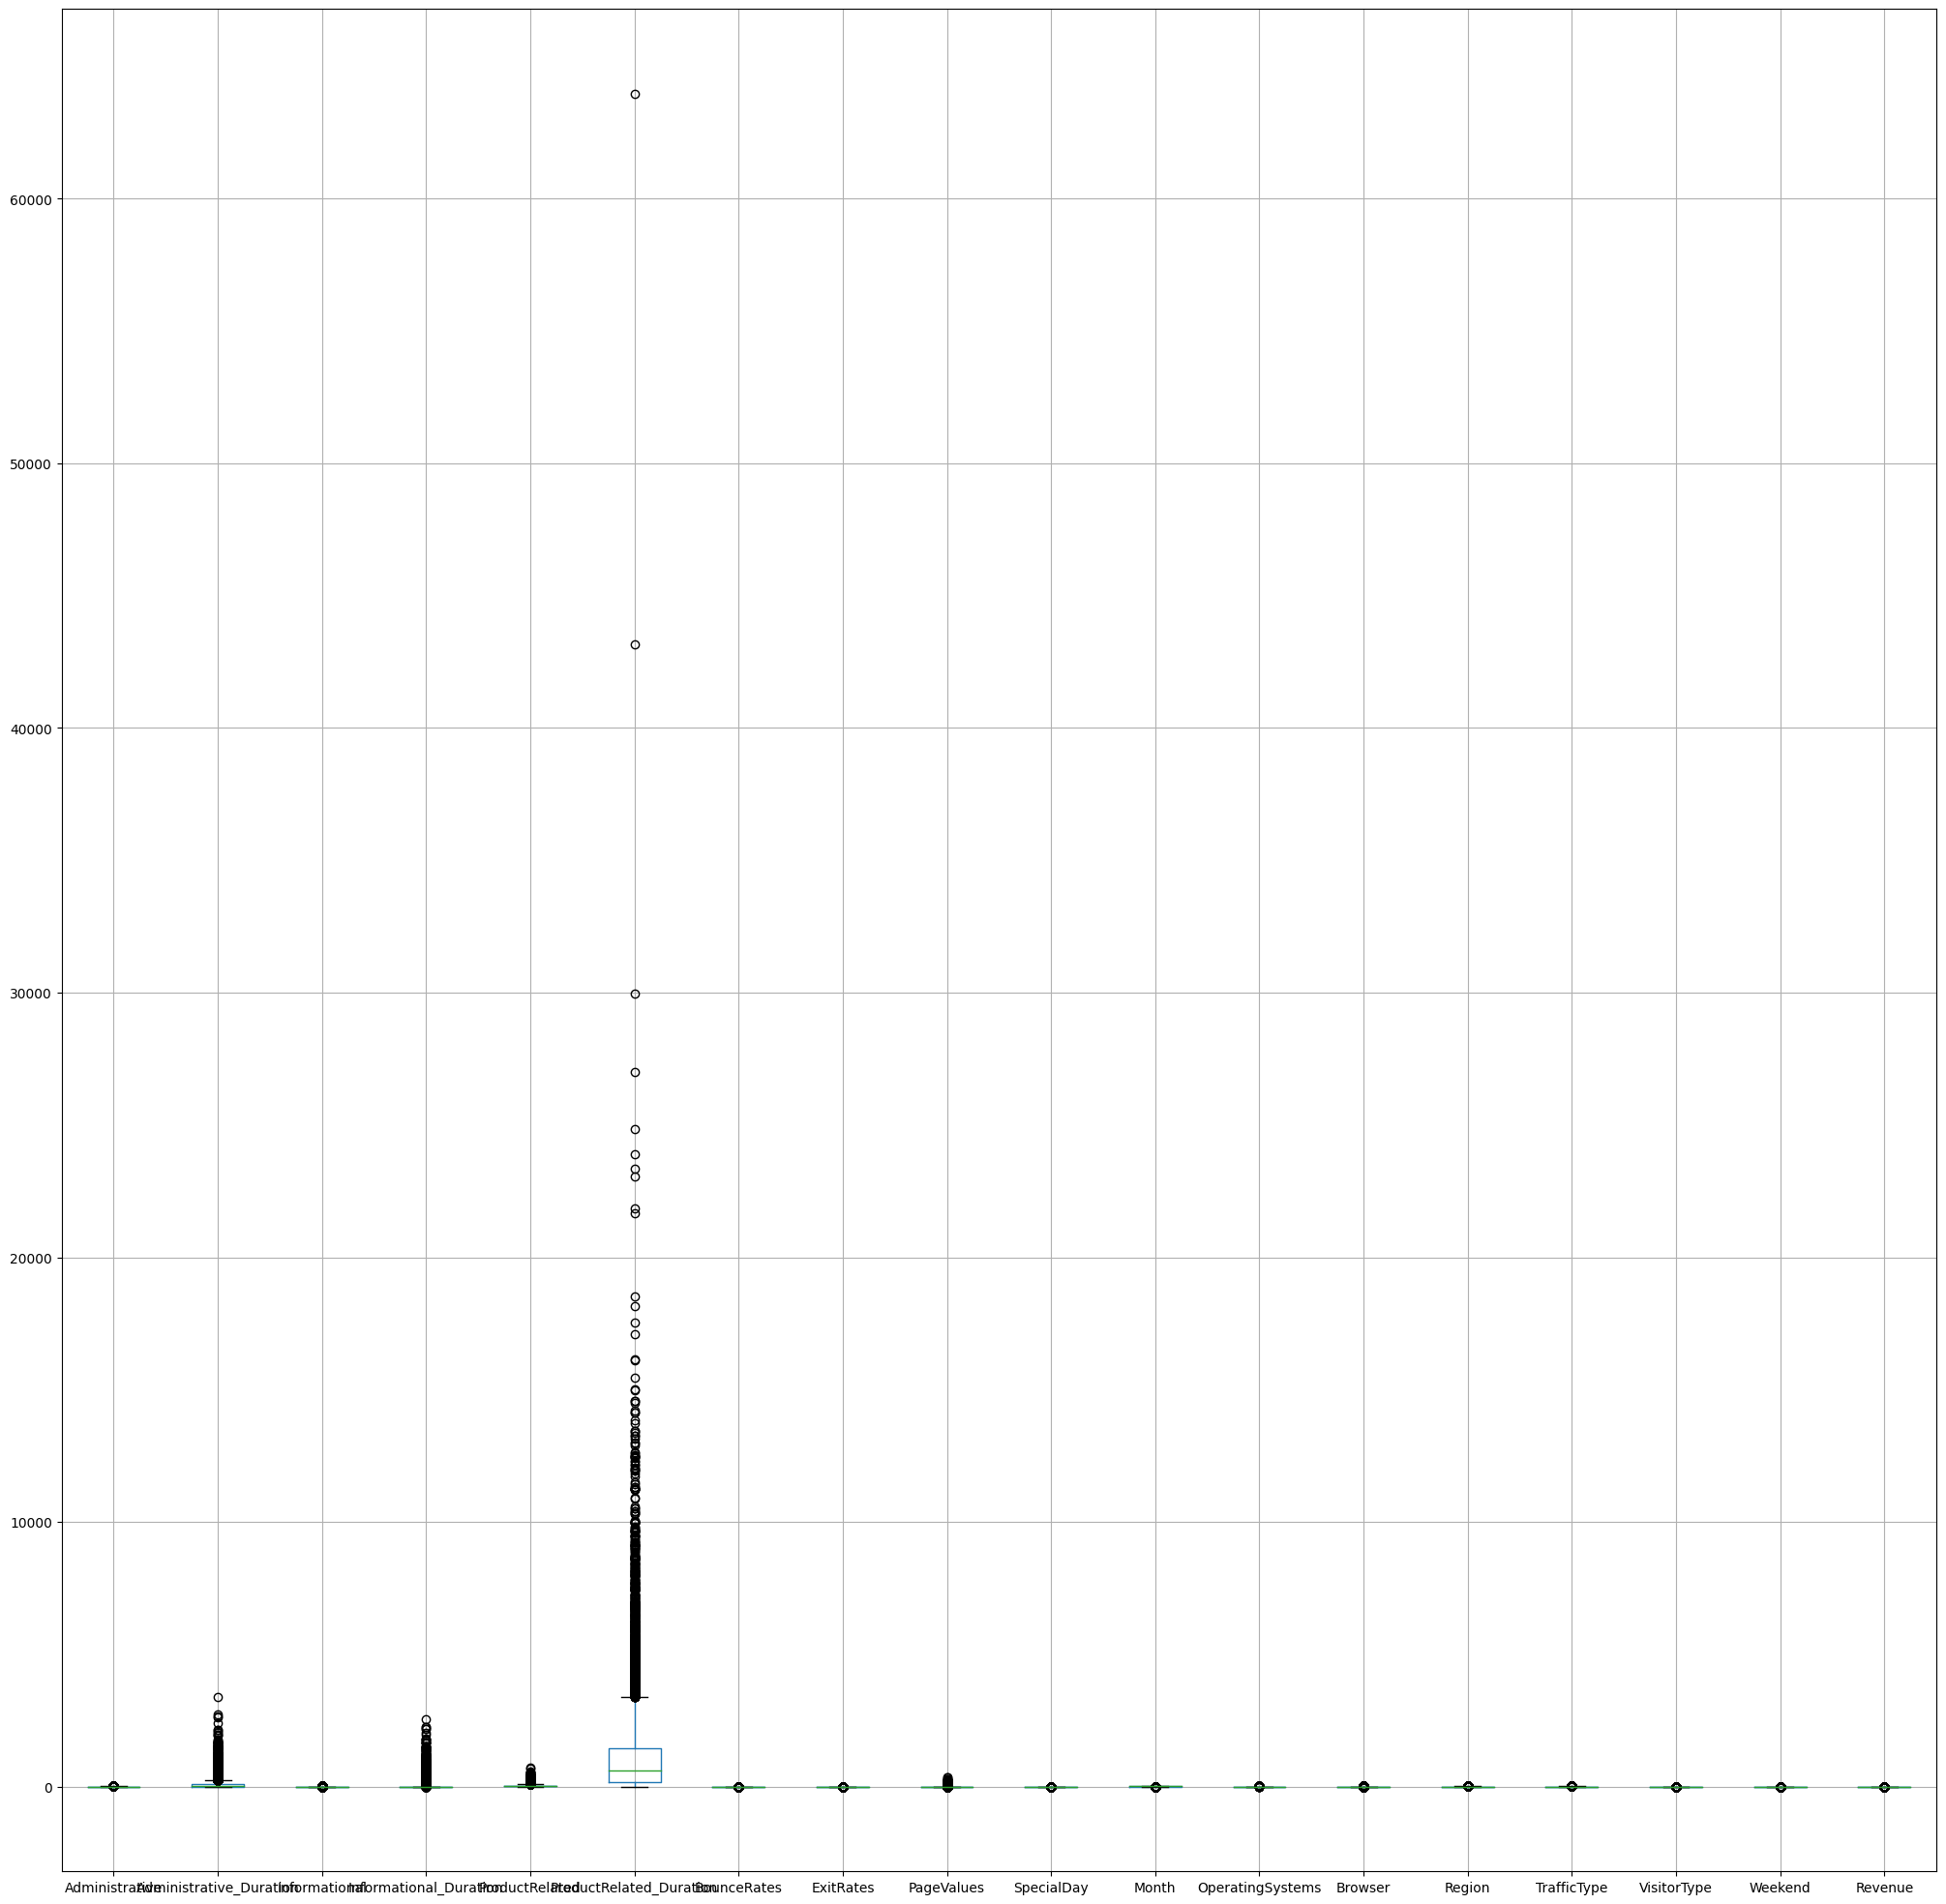

In [ ]:
df.boxplot(figsize = (25,25))

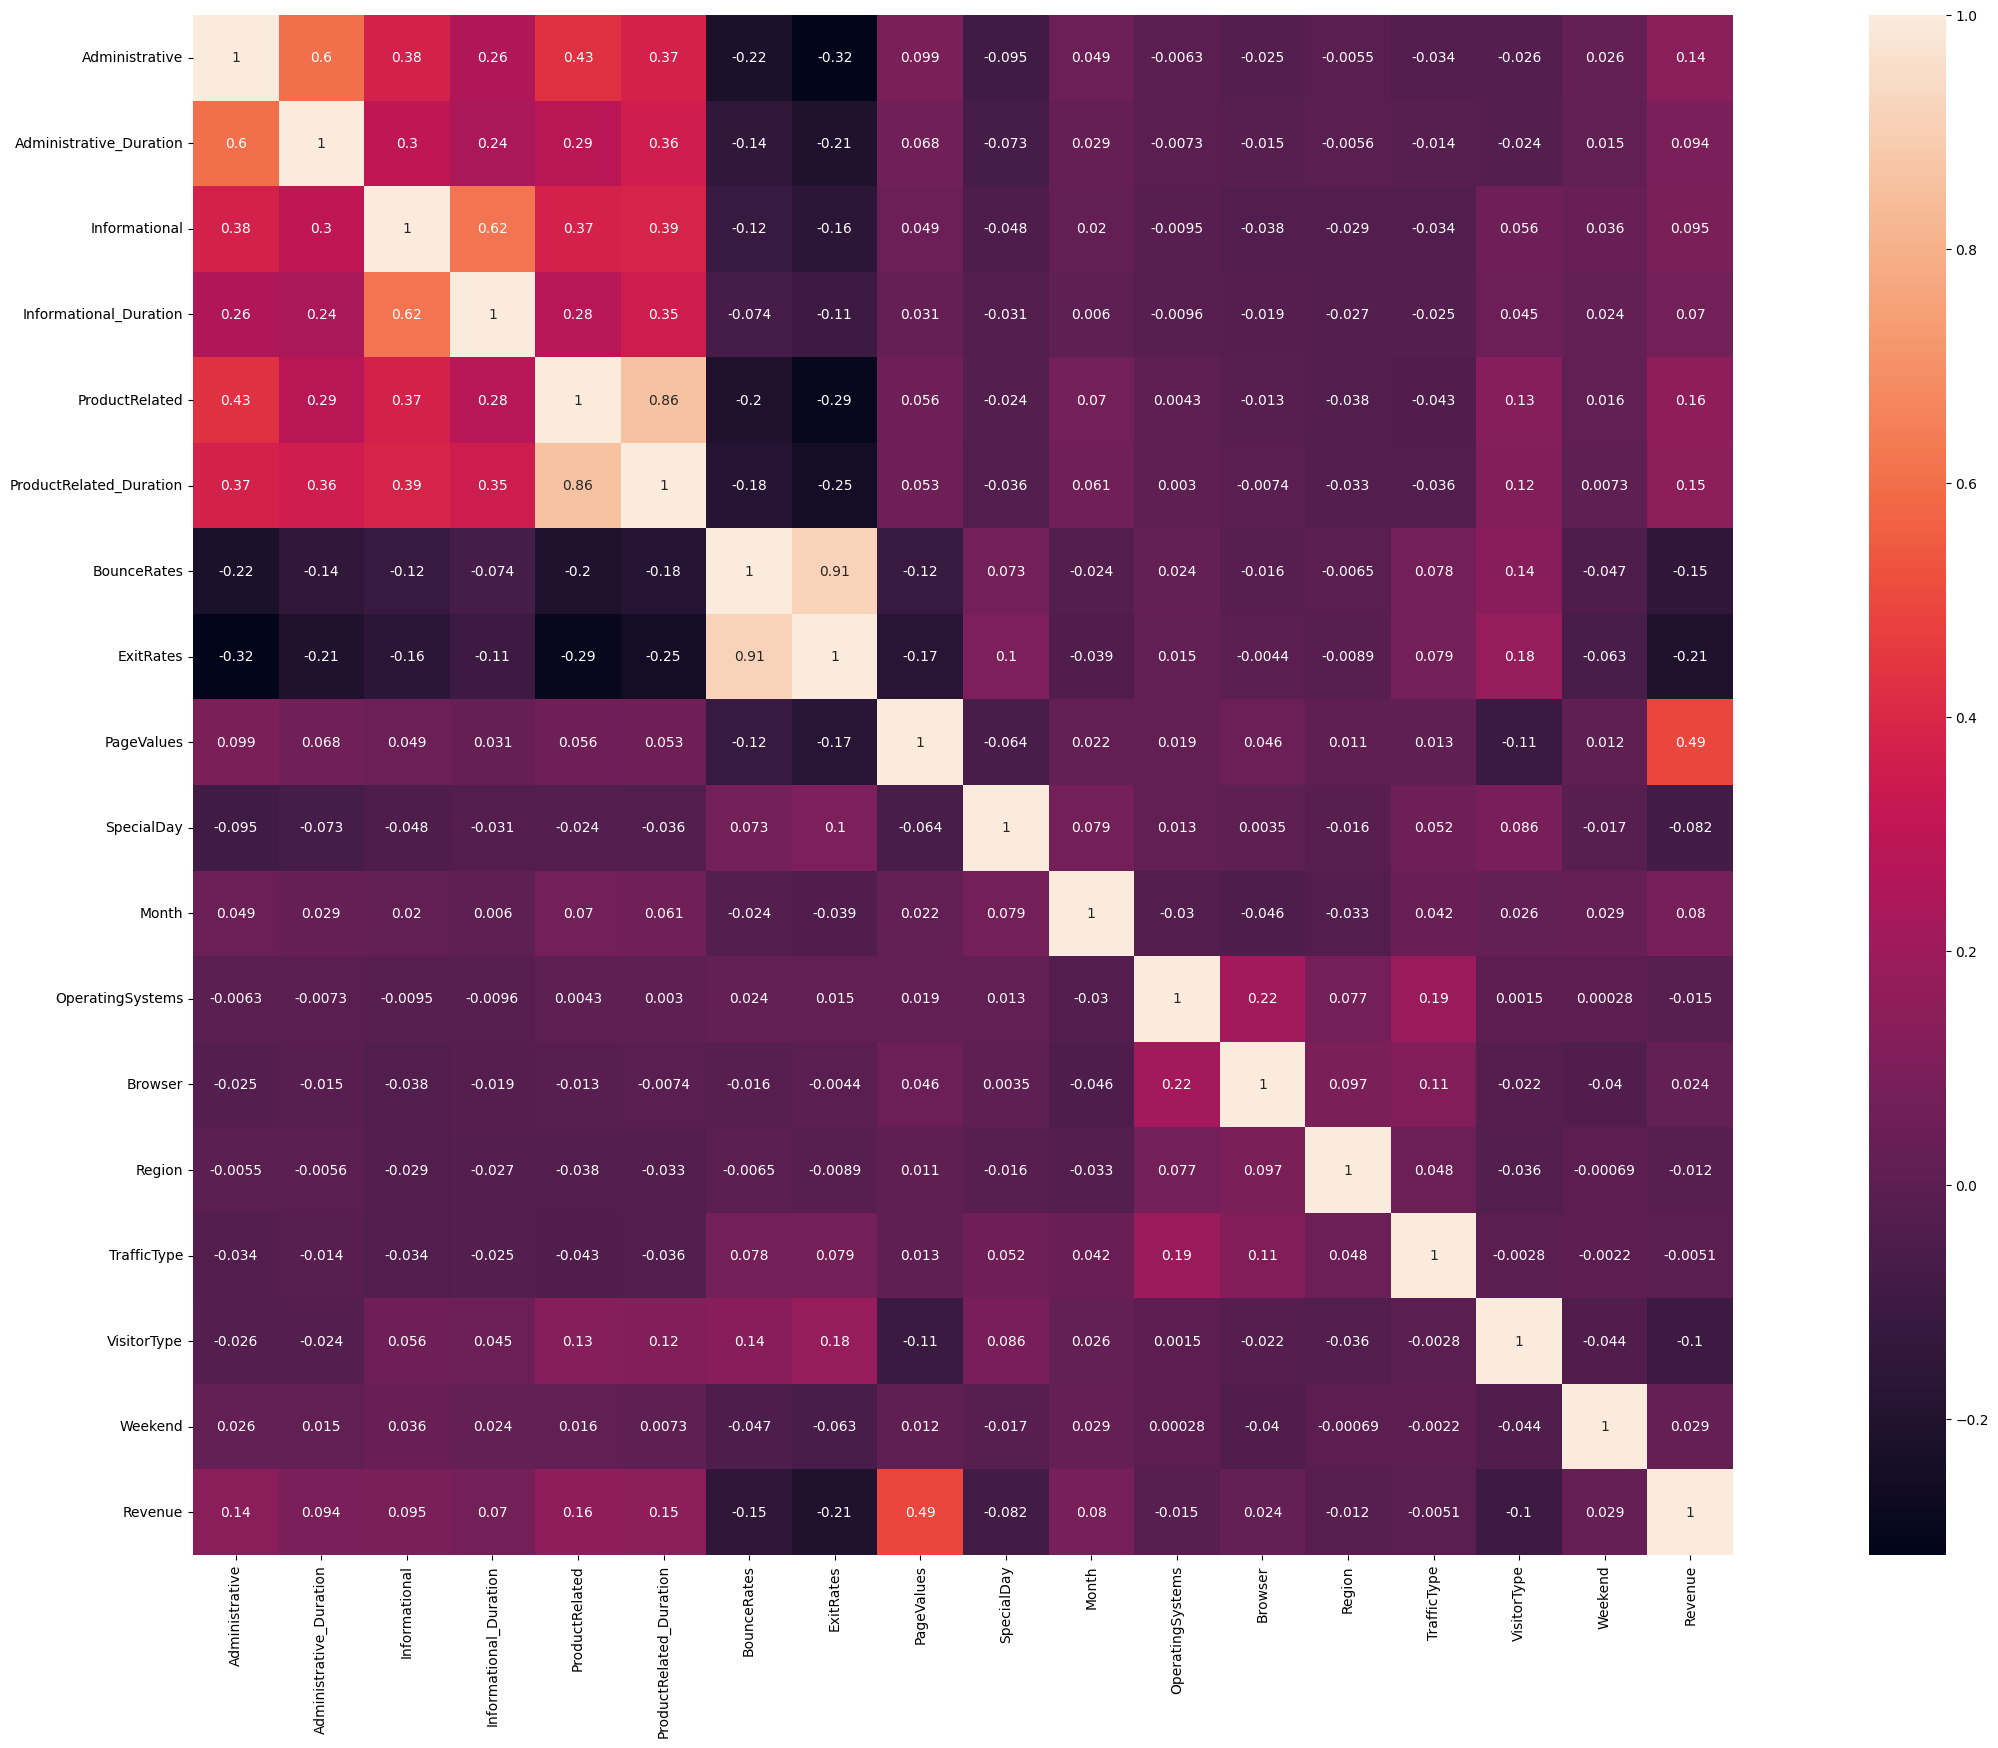

In [ ]:
corr = df.corr()
plt.figure(figsize=(35, 20))
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

So these are some features that are impacting the revenue in negatively impacting
1.Bounce Rates 0.15

2.exitrate 0.21

3.special day 0.082

4.os 0.015

5.region 0.012

6.traffuc type 0.0051

7.visitor type 0.1


**Positively**
1. rest


producted related,page values are high impacting

**Spliting**

In [ ]:
df.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


In [ ]:
# Define feature and target columns
X = df.drop(columns=['Revenue'])  # Features
y = df['Revenue']  # Target label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###### Combining features and target for TensorFlow Decision Forest input

In [ ]:
model = tfdf.keras.RandomForestModel()

Use /tmp/tmp0zlfpgvq as temporary training directory


In [ ]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [ ]:
# Convert the training data to a TensorFlow dataset
train_dataset = pd.concat([X_train, y_train], axis=1)
test_dataset = pd.concat([X_test, y_test], axis=1)


In [ ]:
# Convert pandas DataFrames to TensorFlow datasets
train_tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(train_dataset, label="Revenue")
test_tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(test_dataset, label="Revenue")


In [ ]:
model.fit(train_tf_dataset)

Reading training dataset...
Training dataset read in 0:00:13.458356. Found 9864 examples.
Training model...
Model trained in 0:00:12.272364
Compiling model...
Model compiled.


In [ ]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

In [ ]:
evaluation = model.evaluate(test_tf_dataset)

3/3 [==============================] - 1s 74ms/step - loss: 0.0000e+00


In [ ]:
model.summary()

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (17):
	Administrative
	Administrative_Duration
	BounceRates
	Browser
	ExitRates
	Informational
	Informational_Duration
	Month
	OperatingSystems
	PageValues
	ProductRelated
	ProductRelated_Duration
	Region
	SpecialDay
	TrafficType
	VisitorType
	Weekend

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.              "PageValues"  0.365836 ################
    2.               "ExitRates"  0.186569 #####
    3.                   "Month"  0.169904 ####
    4. "ProductRelated_Duration"  0.165686 ####
    5.          "ProductRelated"  0.143589 ###
    6.             "BounceRates"  0.140241 

In [ ]:
predictions = model.predict(test_tf_dataset)

3/3 [==============================] - 0s 47ms/step


In [ ]:
print("Random Forest model evaluation:", evaluation)

Random Forest model evaluation: 0.0


In [ ]:
# Convert predictions to label format
predicted_classes = [round(pred[0]) for pred in predictions]  # Round the predicted value to nearest class

accuracy = accuracy_score(y_test, predicted_classes)
f1 = f1_score(y_test, predicted_classes, average='weighted')
precision = precision_score(y_test, predicted_classes, average='weighted')
recall = recall_score(y_test, predicted_classes, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy*100}")
print(f"F1 Score: {f1*100}")
print(f"Precision: {precision*100}")
print(f"Recall: {recall*100}")

Accuracy: 89.4566098945661
F1 Score: 88.76486457033691
Precision: 88.72239362197428
Recall: 89.4566098945661


Accuracy: 0.894566098945661
F1 Score: 0.8876486457033691
Precision: 0.8872239362197428
Recall: 0.894566098945661


In [ ]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, predicted_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2055
           1       0.75      0.55      0.63       411

    accuracy                           0.89      2466
   macro avg       0.83      0.76      0.79      2466
weighted avg       0.89      0.89      0.89      2466



Overall Accuracy:

The model has an accuracy of 0.89, meaning it correctly predicted the class for 89% of the instances in the test set. This is generally considered a good accuracy.

Precision:

Class 0 (majority class): 0.91 (high precision, indicating a low false positive rate).
Class 1 (minority class): 0.75 (reasonable precision, but could be improved).

Recall:

Class 0: 0.96 (very good recall, indicating it captures almost all true positives).
Class 1: 0.55 (low recall, indicating that the model misses a significant portion of the actual positive cases for this class).

F1-Score:

Class 0: 0.94 (very good F1 score, reflecting a balance between precision and recall).
Class 1: 0.63 (lower F1 score, indicating that while precision is decent, recall is quite low).

Macro vs. Weighted Averages:

Macro Average: Average of metrics calculated for each class without considering class imbalance, showing a balanced view of the model's performance across classes (precision: 0.83, recall: 0.76, F1: 0.79).
Weighted Average: Takes class imbalance into account (precision: 0.89, recall: 0.89, F1: 0.89), reflecting the model's performance on the dataset as a whole.

Conclusion:

Strengths:  model performs very well on the majority class (class 0), showing high precision, recall, and F1 score. The overall accuracy is also strong.

Weaknesses: The performance on the minority class (class 1) is lacking, particularly in recall, which means it struggles to identify true positives for this class. This is a common issue in imbalanced datasets.